In [1]:
from sklearn.datasets import make_blobs 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

<Axes: >

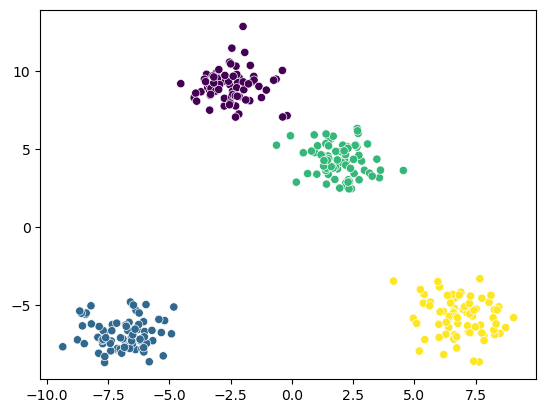

In [2]:
x,y=make_blobs(
    n_samples=300,
    n_features=4,
    centers=4,
    random_state=42
)
sns.scatterplot(x=x[:,0],y=x[:,1],c=y)

In [3]:
kmeans=KMeans(
    n_clusters=4,
    init='k-means++',
    random_state=42
)
sc=StandardScaler()
x=sc.fit_transform(x)

In [4]:
labels=kmeans.fit_predict(x)

<Axes: >

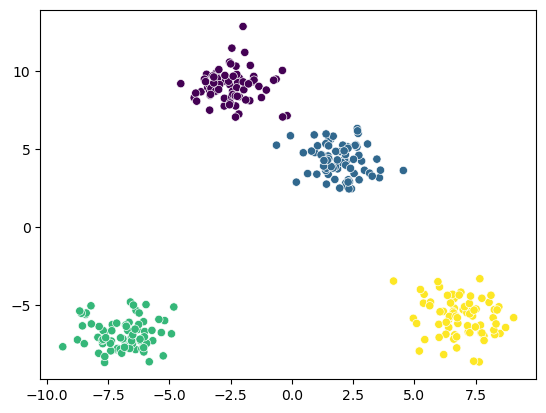

In [5]:
x,y=make_blobs(
    n_samples=300,
    n_features=4,
    centers=4,
    random_state=42
)
sns.scatterplot(x=x[:,0],y=x[:,1],c=labels)

what if we did'nt know how many clusters to use 

In [6]:
wcss=[]
for k in range(2,21):
    kmeans=KMeans(
    n_clusters=k,
    init='k-means++',
    random_state=42
    )
    labels=kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)

lets first see visually if we can find the best cluster value 

<Axes: >

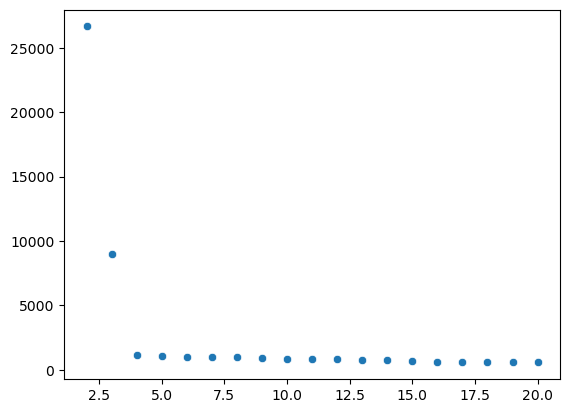

In [7]:
sns.scatterplot(x=[k for k in range(2,21)],y=wcss)

or we use knee locator 

In [8]:
from kneed import KneeLocator 
elbow=KneeLocator(x=[k for k in range(2,21)],y=wcss,curve='convex',direction='decreasing')
print(f'best cluster value is {elbow.knee}')

best cluster value is 4


second method is silhoutte score 

In [9]:
from sklearn.metrics import silhouette_score

<Axes: >

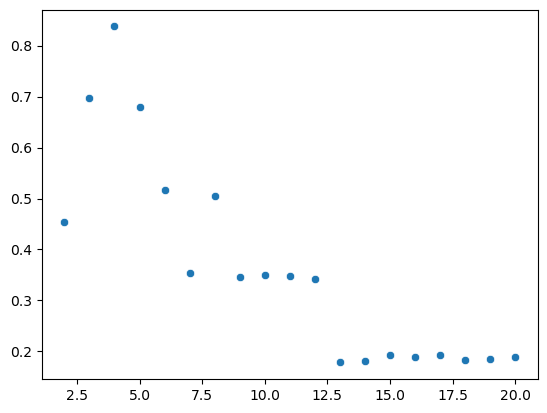

In [10]:
ss=[]
for k in range(2,21):
    kmeans=KMeans(
    n_clusters=k,
    init='k-means++',
    random_state=42
    )
    labels=kmeans.fit_predict(x)
    ss.append(silhouette_score(x,labels))
sns.scatterplot(x=[k for k in range(2,21)],y=ss)

now lets do some dimensonality reduction 

In [14]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x)
kmeans=KMeans(
    n_clusters=4,
    init='k-means++',
    random_state=42
    )
labels=kmeans.fit_predict(pca_data)

<Axes: >

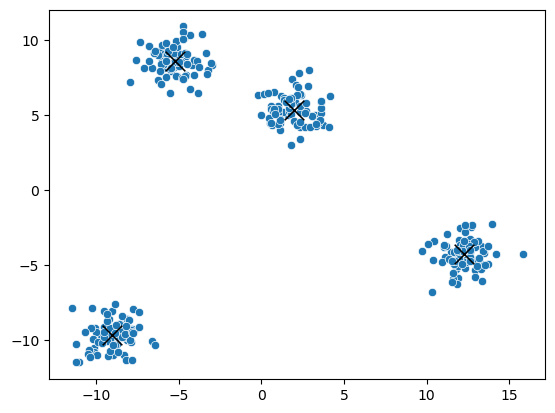

In [19]:
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1])
sns.scatterplot(
    x=kmeans.cluster_centers_[:,0],
    y=kmeans.cluster_centers_[:,1],
    marker='x',
    s=200,
    color='black'
)